# Calcul de la constante de Lifschitz sans entrainement

In [1]:
# importation
import numpy as np
from torch.autograd import Variable
import torch
import matplotlib.pyplot as plt
%matplotlib inline
# local
from FBResNet.myfunc import Physics
from FBResNet.myfunc import MyMatmul
from FBResNet.main import FBRestNet
from FBResNet.model import MyModel
from FBResNet.posttreat import Export_hyper

### Parametres

In [2]:
exp1 = FBRestNet(experimentation=Physics(2000,50,1,1), nb_blocks=20, noise = 0.05,\
                 folder = './', im_set="Set1",batch_size=[600,1],\
                 lr=1e-3, nb_epochs=[30,1])

### Data set
On entraine sur 300 données et on évalue sur 100.

In [3]:
train_set, val_set = exp1.CreateDataSet()

### Trainings
Entrainement sur 20 époques, learning rate de $10^{-3}$.
On trace la constante de Lipschitz au cours de l' entrainement.

epoch :  0  -----  validation :  6.152126096269021e-05
epoch :  1  -----  validation :  5.597773083970775e-05
epoch :  2  -----  validation :  5.2087957743451764e-05
epoch :  3  -----  validation :  4.9644589310917205e-05
epoch :  4  -----  validation :  4.810263800122377e-05
epoch :  5  -----  validation :  4.7189413884433946e-05
epoch :  6  -----  validation :  4.668762807999536e-05
epoch :  7  -----  validation :  4.642117253971452e-05
epoch :  8  -----  validation :  4.6273029266699973e-05
epoch :  9  -----  validation :  4.619655549929427e-05
epoch :  10  -----  validation :  4.6153118279135154e-05
epoch :  11  -----  validation :  4.6127669876986876e-05
epoch :  12  -----  validation :  4.6110797609972865e-05
epoch :  13  -----  validation :  4.6100213289970615e-05
epoch :  14  -----  validation :  4.608764605899839e-05
epoch :  15  -----  validation :  4.607725931415171e-05
epoch :  16  -----  validation :  4.606888155169474e-05
epoch :  17  -----  validation :  4.60600129751660

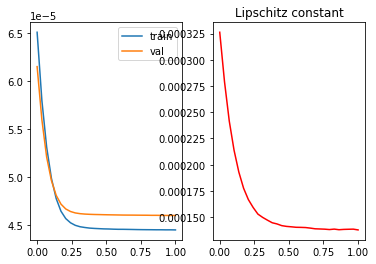

Final Lipschitz constant =  0.00013777418729805262


In [4]:
exp1.train(train_set,val_set,save_model=True)

### Affichage de résultats

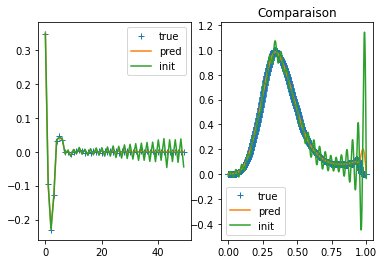

Erreur relative :  0.005491218020407522


In [5]:
l_i, l_t, l_p = exp1.test(val_set)

### Affichage paramètres

In [6]:
k = np.linspace(1,20,20)
gamma =np.zeros(20)
reg   =np.zeros(20)
mu    =np.zeros(20)
for i in range(0,len(exp1.model.Layers)):
    gamma[i] = exp1.model.Layers[i].gamma_reg[0]
    reg[i]   = exp1.model.Layers[i].gamma_reg[1]
    mu[i]    = exp1.model.Layers[i].mu[0]

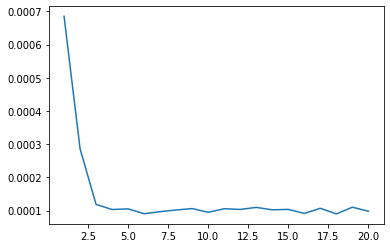

In [7]:
plt.plot(k,gamma)

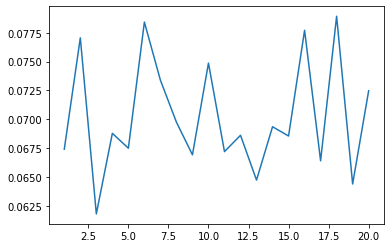

In [8]:
plt.plot(k,reg)

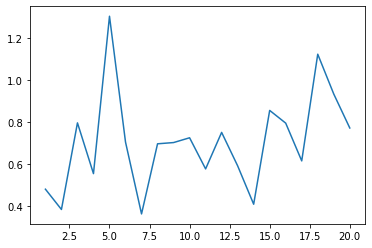

In [9]:
plt.plot(k,mu)

In [11]:
# folder = './Redaction/data'
# Export_hyper(exp1,x_init,x_b,folder)

### REG Parameter

In [ ]:
from torch.autograd import Variable
minibatch = iter(val_set)
[y, x] = next(minibatch)            # gets the minibatch
x_true = Variable(x,requires_grad=False)
x_bias = Variable(y,requires_grad=False)

In [ ]:
from FBResNet.model import Cnn_reg

In [ ]:
exp=Physics(2000,50,1,1)
mycnn = Cnn_reg(exp)

In [ ]:
mycnn(x_bias)

### Test with gaussian

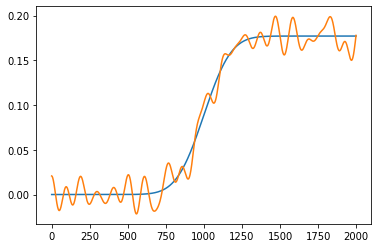

x-xp/x = 0.6399874831806278


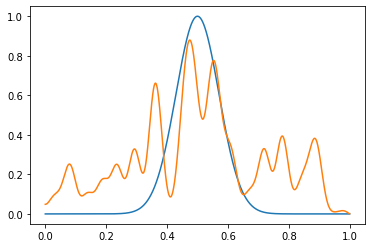

In [12]:
exp1.test_gauss(noise=0.1)

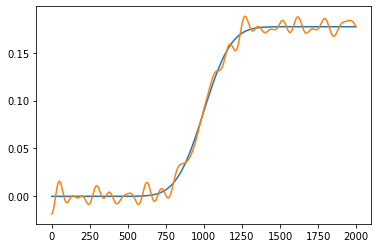

x-xp/x = 0.3587232833426379


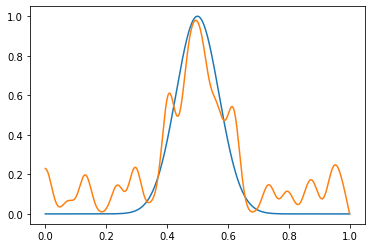

In [13]:
exp1.test_gauss(noise=0.05)

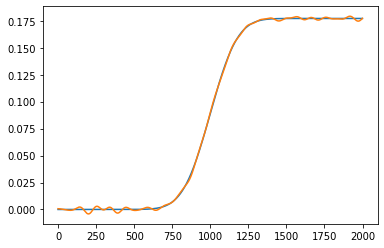

x-xp/x = 0.08264244036780417


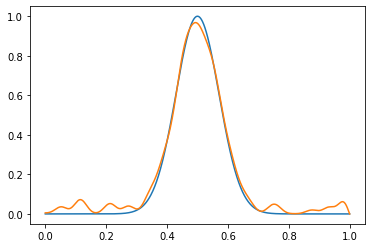

In [14]:
exp1.test_gauss(noise=0.01)

### Lipschitz constant

In [ ]:
exp1.model.Lipschitz(opt1="semi",opt2="entree11")

In [ ]:
exp1.model.Lipschitz(opt1="semi",opt2="entree01")